In [1]:
import datacube
import pandas
from datacube.storage import masking

dc = datacube.Datacube()


In [2]:
# Define some 'constants' for the program
p = 'LC08_scene'
start = '1999-1'
end = '2018-6'
res = (0.0025, -0.0025)
m = 'quality'

In [3]:
# Load data as an xarray.Dataset
data = dc.load(product = p, resolution = res)

In [15]:
# Isolate the band of interest as an xarray.DataArray
data_time = data.green.loc[ start : end ]

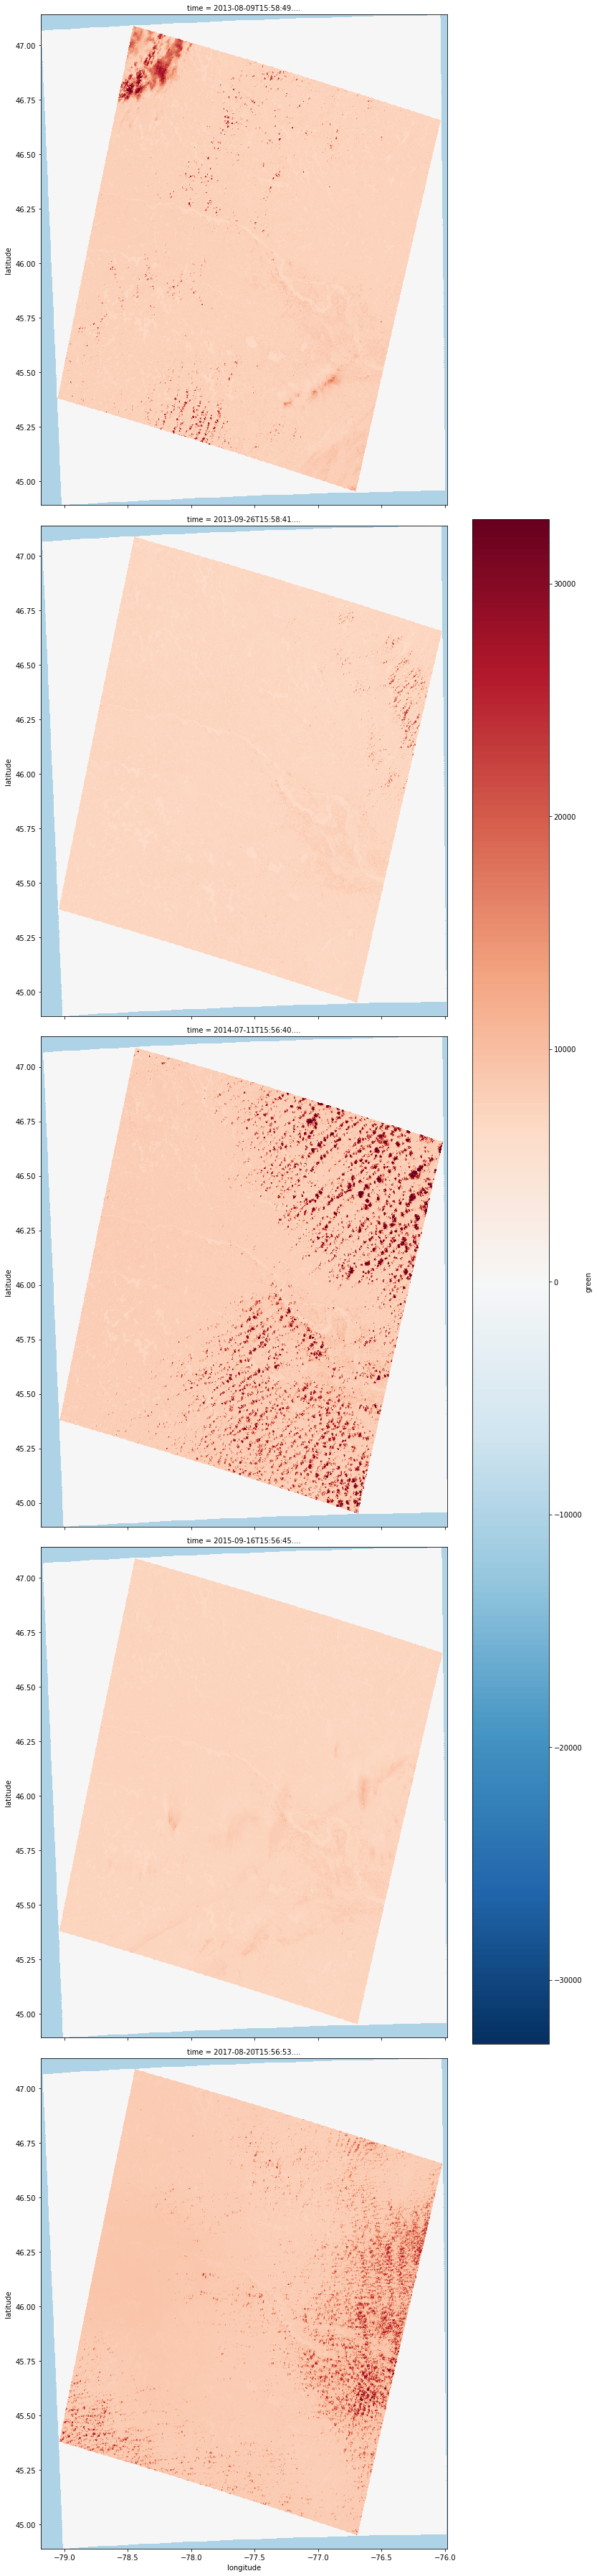

In [20]:
#Visualize the data using the plot function
data_time.plot(col='time'
        , col_wrap = 2
        , size = 5)

In [21]:
#Mask out all the invalid band data as a xarray.DataArray
valid_data_time = data_time.where(data_time != data_time.attrs['nodata'])

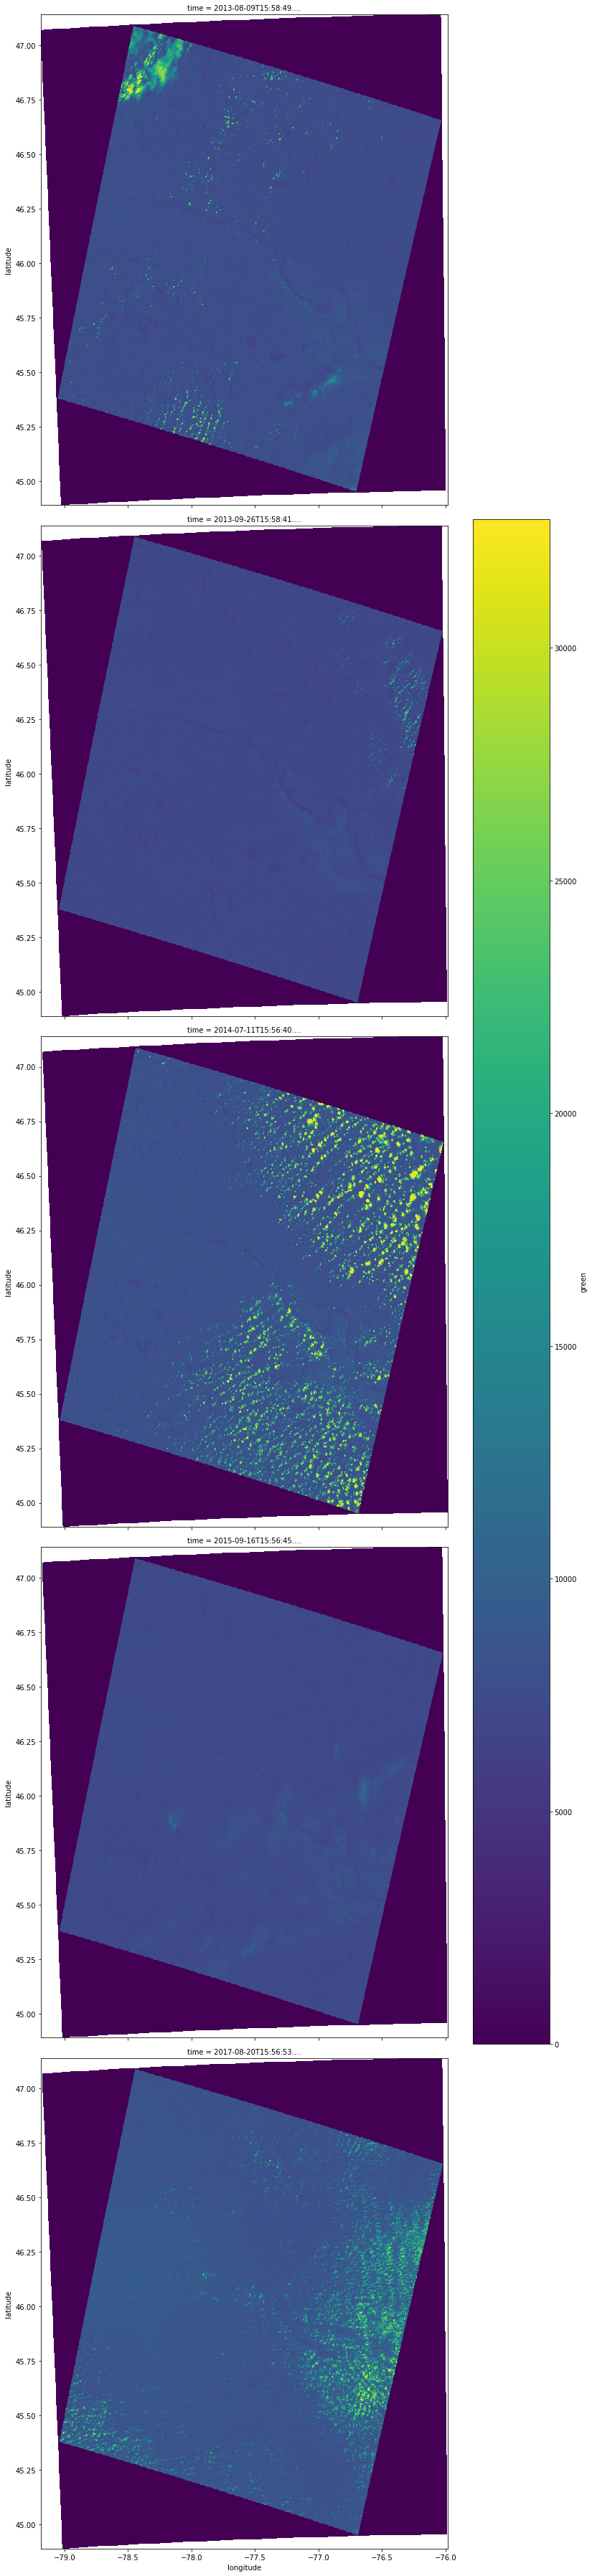

In [22]:
#Visualize the valid data using the plot function
valid_data_time.plot(col='time'
         , col_wrap = 2
         , size = 5)

In [23]:
# Load the quality band of the dataset, as an xarray.Dataset
m = 'quality'
pq = dc.load(product=p, measurements = [m], resolution = res)

In [24]:
# Use the masking library to see how the bit flags are defined in the dataset
pandas.DataFrame.from_dict(masking.get_flags_def(pq), orient='index')

bits  \
cirrus_confidence       [11, 12]   
cloud                        [4]   
cloud_confidence          [5, 6]   
cloud_shadow_conf         [7, 8]   
designated_fill              [0]   
radiometric_saturation    [2, 3]   
snow_ice_conf            [9, 10]   
terrain_occlusion            [1]   

                                                                   values  \
cirrus_confidence       {'0': 'Not Determined', '1': 'Low', '2': 'Medi...   
cloud                                             {'0': False, '1': True}   
cloud_confidence        {'0': 'Not Determined', '1': 'Low', '2': 'Medi...   
cloud_shadow_conf       {'0': 'Not Determined', '1': 'Low', '2': 'Medi...   
designated_fill                                   {'0': False, '1': True}   
radiometric_saturation  {'0': 'none', '1': '1-2', '2': '3-4', '3': '<=5'}   
snow_ice_conf           {'0': 'Not Determined', '1': 'Low', '2': 'Medi...   
terrain_occlusion                                 {'0': False, '1': True}   

                                                              description  
cirrus_confidence       Cirrus Confidence with low =(0-33)%, medium =(...  
cloud                                                               Cloud  
cloud_confidence        Cloud Confidence with low =(0-33)%, medium =(3...  
cloud_shadow_conf       Cloud Shadow Confidence with low =(0-33)%, med...  
designated_fill                              Used to identify fill values  
radiometric_saturation  Radiometric saturation bits, represents how ma...  
snow_ice_conf           Snow/Ice Confidence with low =(0-33)%, medium ...  
terrain_occlusion                                       Terrain Occlusion

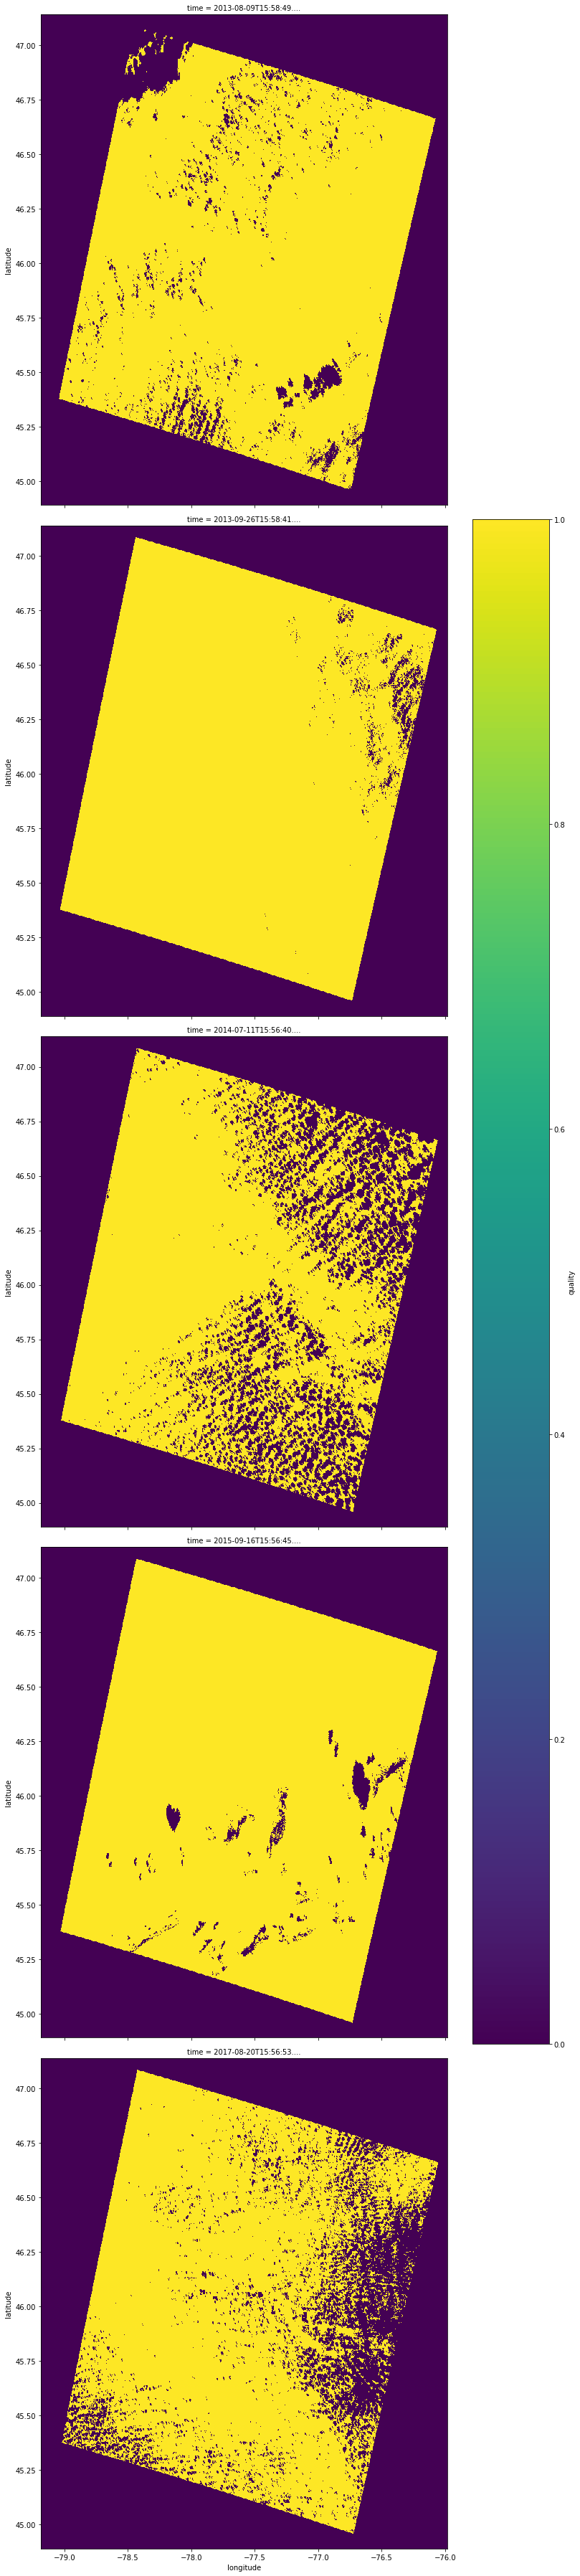

In [25]:
# Make a mask for the pq band
good_data = masking.make_mask(pq, cloud = False, cloud_shadow_conf='Low', cirrus_confidence='Low')
                              
autumn_good_data = good_data.quality.loc[start : end]

#Visualize data
autumn_good_data.plot(col='time'
                      , col_wrap = 1 
                      , size = 10
                     )

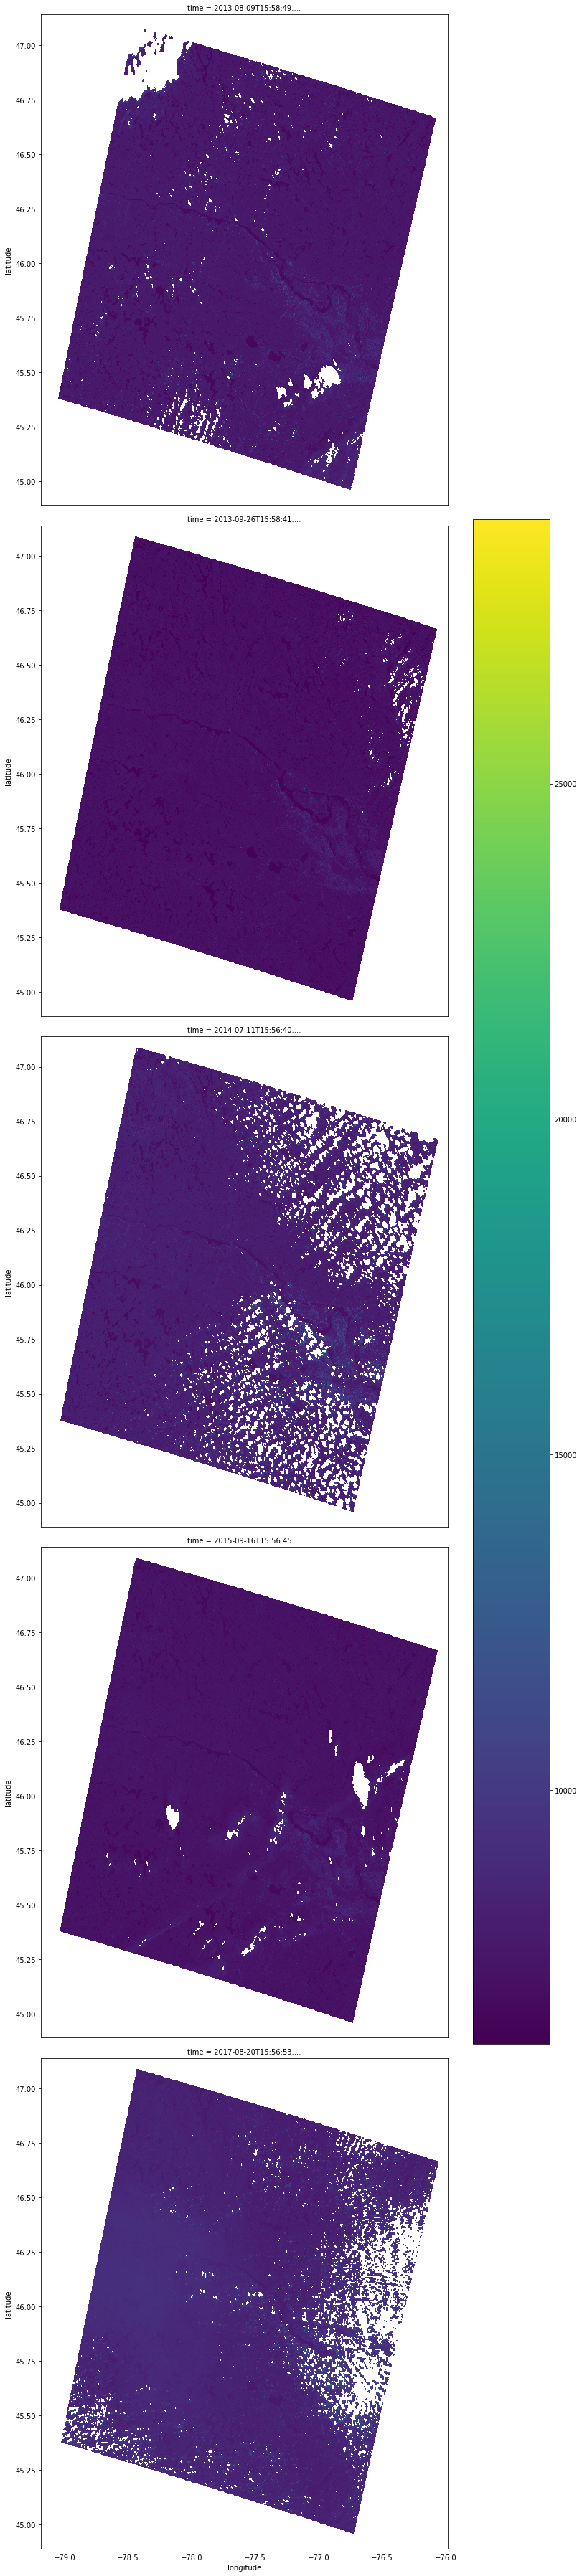

In [26]:
#  Combine the mask and the band info
autumn_cloud_free = valid_data_time.where(autumn_good_data)
autumn_cloud_free.plot(col='time'
                       , col_wrap = 1
                       , size = 10
                      )